## 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


- 何を学習し、何を予測するのか
- どのようなファイルを作りKaggleに提出するか
- 提出されたものはどういった指標値で評価されるのか

### 何を学習し、何を予測するのか

> 1顧客に対し120の特徴量から顧客の返済能力の可否について予測する。

### どのようなファイルを作りKaggleに提出するか

> SK_ID_CURRとTARGET変数の確率値のcsvdata

### 提出されたものはどういった指標値で評価されるのか
> ROC曲線(受信機動作特性):偽陽性率（FPR）に対して真陽性率（TPR）をプロットすることによって作成されます。  
[ROC曲線サンプル図 by scikit-learn ROC](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png)

## 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# trainデータとtestデータの読み込み
df_train = pd.read_csv("application_train.csv")
df_test = pd.read_csv("application_test.csv")

In [3]:
# trainデータの確認
display(df_train.head())
display(df_train.info())
display(df_train.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
# 欠損値の確認
missing_data = pd.DataFrame(df_train.isnull().sum() / len(df_train))
missing_data50 = missing_data[missing_data.iloc[:, 0] > 0.5]
display(missing_data50.head())
display(missing_data50.shape)

,0
OWN_CAR_AGE,0.659908
EXT_SOURCE_1,0.563811
APARTMENTS_AVG,0.507497
BASEMENTAREA_AVG,0.585160
YEARS_BUILD_AVG,0.664978


(41, 1)

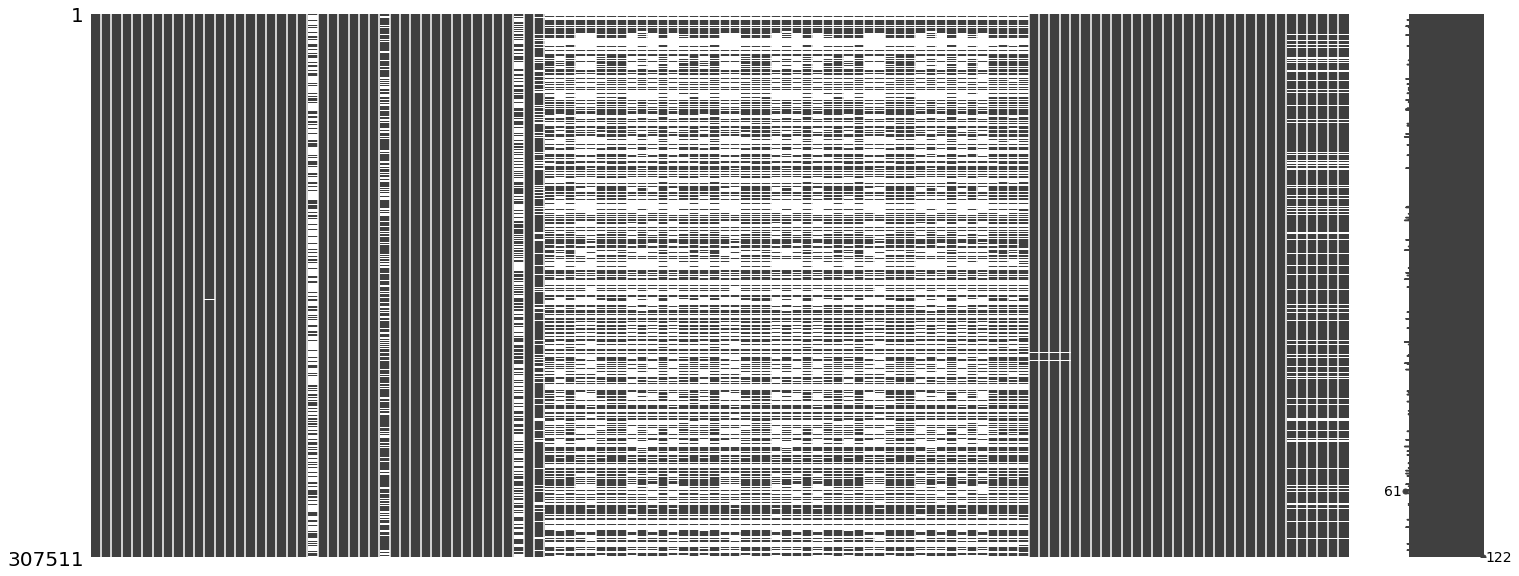

In [5]:
msno.matrix(df_train)

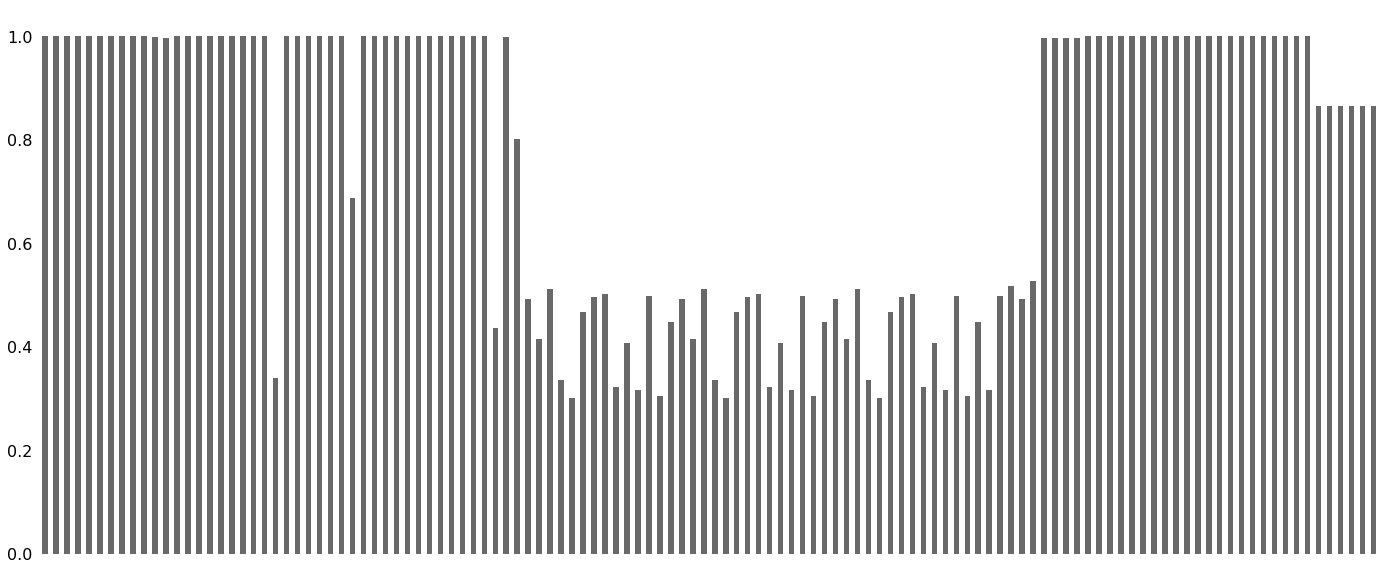

In [6]:
msno.bar(df_train)

In [7]:
# 欠損値のないデータを説明変数とする。今回はAMT_INCOMEとAMT_CREDITの2つ。
df_selected = df_train.loc[:, ["SK_ID_CURR", "TARGET", "AMT_INCOME_TOTAL","AMT_CREDIT"]]
display(df_selected.head())
display(df_selected.info())
display(df_selected.isnull().sum())
#df_selected.dropna(how="all", axis=1)

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
0,100002,1,202500.0,406597.5
1,100003,0,270000.0,1293502.5
2,100004,0,67500.0,135000.0
3,100006,0,135000.0,312682.5
4,100007,0,121500.0,513000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
SK_ID_CURR          307511 non-null int64
TARGET              307511 non-null int64
AMT_INCOME_TOTAL    307511 non-null float64
AMT_CREDIT          307511 non-null float64
dtypes: float64(2), int64(2)
memory usage: 9.4 MB


None

SK_ID_CURR          0
TARGET              0
AMT_INCOME_TOTAL    0
AMT_CREDIT          0
dtype: int64

In [8]:
# Xとyに値を渡す
X = df_selected.iloc[:, 2:]
y = df_selected.iloc[:, 1]

display(X.head())
display(X.shape)
display(y.head())

,AMT_INCOME_TOTAL,AMT_CREDIT
0,202500.0,406597.5
1,270000.0,1293502.5
2,67500.0,135000.0
3,135000.0,312682.5
4,121500.0,513000.0


(307511, 2)

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(215257, 2)
(92254, 2)
(215257,)
(92254,)


In [10]:
# 標準化する
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

In [11]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train_scaler, y_train)
dt_pred = dt.predict(X_train_scaler)
dt_pred_prob = dt.predict_proba(X_train_scaler)
dt_importance = dt.feature_importances_

dt_result = [accuracy_score(y_train, dt_pred), precision_score(y_train, dt_pred), recall_score(y_train, dt_pred), f1_score(y_train, dt_pred)]

In [12]:
# 各指標値の算出
print("▼決定木の各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result[0], dt_result[1], dt_result[2], dt_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_train, dt_pred)))

▼決定木の各指標値
正答率(accuracy_score):0.93, 適合率(precision):0.97, 再現率(Recall):0.15, F値:0.26
混同行列は
[[197879     90]
 [ 14634   2654]]


In [13]:
# 重要度の確認
print("重要度:{}".format(dt_importance))

重要度:[0.48939708 0.51060292]


In [14]:
# ROCスコアの算出
from sklearn.metrics import roc_auc_score

print("ROCスコア:{}".format(roc_auc_score(y_train, dt_pred_prob[:, 1])))

ROCスコア:0.8532109040466511


## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [15]:
# test.csvのdfで同じカラムのものを取得
df_test_selected = df_test.loc[:, ["AMT_INCOME_TOTAL","AMT_CREDIT"]]
df_test_selected.head()

# 標準化する
app_test_scaler = scaler.transform(df_test_selected)
app_test_scaler

# 対数確率をとる
dt_app_prob = dt.predict_proba(app_test_scaler)[:, 1]
dt_app_prob.shape

(48744,)

In [16]:
df_output = pd.DataFrame({'SK_ID_CURR': df_test.SK_ID_CURR,'TARGET': dt_app_prob})
df_output.to_csv("output.csv", index=False)

## kaggleへ提出
[提出csvファイル](https://github.com/adachione/diveintocode-ml/blob/master/Week4/output.csv)

## 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


- どの特徴量を使うか
- どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

## パターン1量的変数のみ抽出して学習する

In [17]:
# 量的変数と質的変数に分ける
df_select_num = df_train.select_dtypes(include=[int, float])
display(df_select_num.head())
display(df_select_num.shape)

df_select_obj = df_train.select_dtypes(exclude=[int, float])
display(df_select_obj.head())
display(df_select_obj.shape)

print("\n量的変数が{}列,質的変数が{}列".format(len(df_select_num.columns), len(df_select_obj.columns)))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 106)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


(307511, 16)


量的変数が106列,質的変数が16列


In [18]:
# 量的変数106列で学習させる
# まず欠損値処理から行う
missing_data = pd.DataFrame(df_select_num.isnull().sum() / len(df_select_num), columns=["missing_rate"])
missing_data50 = missing_data[missing_data.iloc[:, 0] > 0.5]
#missing_data50 = missing_data50.sort_values(by=0, ascending=False)
display(missing_data50.head())
display(missing_data50.shape)

# 欠損値50%以上のカラムを削除する
df_drop = df_select_num.drop(missing_data50.index, axis=1)

# 欠損値のある行を削除する
df_drop = df_drop.dropna()

display(df_drop.head())
#df_select_num_drop = df_select_num.dropna(how="any", axis=0)
#df_select_num_drop

,missing_rate
OWN_CAR_AGE,0.659908
EXT_SOURCE_1,0.563811
APARTMENTS_AVG,0.507497
BASEMENTAREA_AVG,0.585160
YEARS_BUILD_AVG,0.664978


(38, 1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
12,100016,0,0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439,-2717,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
13,100017,0,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,0,112500.0,157500.0,7875.0,157500.0,0.046220,-17718,-7804,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
22,100026,0,1,450000.0,497520.0,32521.5,450000.0,0.020713,-11146,-4306,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [19]:
#FLAG_iという質的変数と思われるデータを発見したため削除する
flag_list = []
for i in range(2, 22):
    flag_list.append("FLAG_DOCUMENT_{}".format(i))

print(flag_list)

df_drop = df_drop.drop(flag_list, axis=1)
df_drop.head()

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
12,100016,0,0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439,-2717,...,0.0,0.0,0.0,-2370.0,0.0,0.0,0.0,1.0,0.0,0.0
13,100017,0,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,...,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,0,112500.0,157500.0,7875.0,157500.0,0.046220,-17718,-7804,...,0.0,8.0,0.0,-239.0,0.0,0.0,0.0,0.0,0.0,0.0
22,100026,0,1,450000.0,497520.0,32521.5,450000.0,0.020713,-11146,-4306,...,0.0,0.0,0.0,-468.0,0.0,0.0,0.0,0.0,0.0,5.0


In [85]:
# 46列の変数データで学習させる
X_1 = df_drop.iloc[:, 2:]
y_1 = df_drop.iloc[:, 1]

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=123)

print(X_1_train.shape)
print(X_1_test.shape)
print(y_1_train.shape)
print(y_1_test.shape)

(86409, 46)
(37033, 46)
(86409,)
(37033,)


In [96]:
# 標準化
scaler.fit(X_1_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_1_train_scaler = scaler.transform(X_1_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_1_test_scaler = scaler.transform(X_1_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

# 学習
dt1 = DecisionTreeClassifier()
dt1.fit(X_1_train_scaler, y_1_train)
dt1_pred = dt1.predict(X_1_test_scaler)
dt1_pred_prob = dt1.predict_proba(X_1_test_scaler)
dt1_importance = dt1.feature_importances_

dt1_result = [accuracy_score(y_1_test, dt1_pred), precision_score(y_1_test, dt1_pred), recall_score(y_1_test, dt1_pred), f1_score(y_1_test, dt1_pred), roc_auc_score(y_1_test, dt1_pred_prob[:, 1])]

In [97]:
# 各指標値の算出
print("▼決定木の各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt1_result[0], dt1_result[1], dt1_result[2], dt1_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_1_test, dt1_pred)))

# 重要度の確認
print("重要度:{}".format(dt1_importance))

# ROCスコアの算出
print("ROCスコア:{}".format(dt1_result[4]))

▼決定木の各指標値
正答率(accuracy_score):0.87, 適合率(precision):0.13, 再現率(Recall):0.14, F値:0.13
混同行列は
[[31995  2489]
 [ 2191   358]]
重要度:[0.00893763 0.04455223 0.04327328 0.05329008 0.02698153 0.04038119
 0.05914889 0.05061546 0.06354013 0.0596591  0.         0.00149339
 0.00810388 0.00092313 0.00493067 0.00359786 0.01071864 0.00401371
 0.00639103 0.03505046 0.00108566 0.00203213 0.00209712 0.00234182
 0.0025314  0.0032961  0.08429922 0.0829585  0.02292602 0.01445523
 0.02470013 0.0099615  0.0209491  0.00759573 0.0568696  0.01262711
 0.00615099 0.01323248 0.0047293  0.05020515 0.00166988 0.0015119
 0.00467757 0.00835594 0.01101614 0.022122  ]
ROCスコア:0.5341344163159755


## 全指標低スコア
- 原因
  - 選定変数が少ないこと
  - 前処理をほとんどしていないため

In [23]:
# 重要度のソートを行う
dt_importance_sort = pd.DataFrame(dt_importance, 
                                 index=df_drop.columns[2:],
                                 columns=["重要度"]).sort_values(by="重要度", ascending=False)
display(dt_importance_sort)

,重要度
EXT_SOURCE_2,0.083436
EXT_SOURCE_3,0.080996
DAYS_REGISTRATION,0.064508
DAYS_ID_PUBLISH,0.062807
TOTALAREA_MODE,0.061256
DAYS_BIRTH,0.059549
AMT_ANNUITY,0.052256
DAYS_EMPLOYED,0.050585
DAYS_LAST_PHONE_CHANGE,0.049175
AMT_CREDIT,0.045242


,重要度
count,46.000000
mean,0.021739
std,0.023887
min,0.000000
25%,0.003602
50%,0.009739
75%,0.038889
max,0.083436


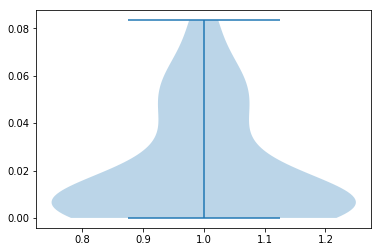

In [24]:
# 統計値の確認
display(dt_importance_sort.describe())

# バイオリンプロットで重要度の上位数値を可視化
plt.violinplot(dt_importance_sort["重要度"])

plt.show()

## RFEなる手法を使って特徴量を取捨選択させてみる
[参考](https://qiita.com/rockhopper/items/a68ceb3248f2b3a41c89)

In [25]:
dt_importance.shape

(46,)

## パターン2ラベルエンコーディングし全特徴量で学習

In [26]:
# 欠損値処理
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)

In [27]:
# 欠損値数の確認
df_test.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                       0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [28]:
# NAME_TYPE_SUITE とOCCUPATION_TYPE の確認
display(df_train[df_train["NAME_TYPE_SUITE"].isnull() == True].iloc[:, 10:].head())
display(df_train[df_train["OCCUPATION_TYPE"].isnull() == True].iloc[:, 20:].head())

,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,450000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1199,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,-3514,9.0,1,0,0,1,0,0,NaN,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,-2512,9.0,1,0,0,1,1,0,NaN,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,-3684,9.0,1,0,0,1,1,0,NaN,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,-2661,1.0,1,1,0,1,0,1,NaN,1.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,-3787,9.0,1,1,0,1,0,1,NaN,2.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


In [29]:
display(df_train["NAME_TYPE_SUITE"].unique())
display(df_train["OCCUPATION_TYPE"].unique())

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [30]:
#NAME_TYPE_SUITE とOCCUPATION_TYPEについては最頻値で補完する
df_train["NAME_TYPE_SUITE"].fillna(df_train["NAME_TYPE_SUITE"].mode()[0], inplace=True)
df_train["OCCUPATION_TYPE"].fillna(df_train["OCCUPATION_TYPE"].mode()[0], inplace=True)

In [31]:
# 再度確認
df_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
                             ..
DEF_30_C

In [32]:
# df_testにも同じ処置をしておく
df_test["NAME_TYPE_SUITE"].fillna(df_test["NAME_TYPE_SUITE"].mode()[0], inplace=True)
df_test["OCCUPATION_TYPE"].fillna(df_test["OCCUPATION_TYPE"].mode()[0], inplace=True)

df_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
                             ..
DEF_30_C

In [33]:
# 欠損値処理ができない4列分について削除する
df_train_1 = df_train.drop(["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"], axis=1)
df_test_1 = df_test.drop(["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"], axis=1)

In [34]:
# カテゴリ変数へラベルエンコーディング
from sklearn.preprocessing import LabelEncoder

categorical_feats = df_train_1.dtypes[df_train_1.dtypes == "object"].index

for cols in categorical_feats:
    le = LabelEncoder()
    df_train_1[cols] = le.fit_transform(df_train_1[cols])
    df_test_1[cols] = le.fit_transform(df_test_1[cols])

In [35]:
df_train_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 116列の変数データで学習させる
X_2 = df_train_1.iloc[:, 2:]
y_2 = df_train_1.iloc[:, 1]

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=123)

print(X_2_train.shape)
print(X_2_test.shape)
print(y_2_train.shape)
print(y_2_test.shape)

(215257, 116)
(92254, 116)
(215257,)
(92254,)


In [68]:
# 標準化
scaler.fit(X_2_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_2_train_scaler = scaler.transform(X_2_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_2_test_scaler = scaler.transform(X_2_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

# 学習
dt2 = DecisionTreeClassifier()
dt2.fit(X_2_train_scaler, y_2_train)
dt2_pred = dt2.predict(X_2_test_scaler)
dt2_pred_prob = dt2.predict_proba(X_2_test_scaler)
dt2_importance = dt2.feature_importances_

In [99]:
dt2_result = [accuracy_score(y_2_test, dt2_pred), precision_score(y_2_test, dt2_pred), recall_score(y_2_test, dt2_pred), f1_score(y_2_test, dt2_pred), roc_auc_score(y_2_test, dt2_pred_prob[:, 1])]

# 各指標値の算出
print("▼決定木の各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt2_result[0], dt2_result[1], dt2_result[2], dt2_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_2_test, dt2_pred)))

# 重要度の確認
#print("重要度:{}".format(dt2_importance))

# ROCスコアの算出
print("ROCスコア:{}".format(dt2_result[4]))

▼決定木の各指標値
正答率(accuracy_score):0.85, 適合率(precision):0.14, 再現率(Recall):0.17, F値:0.16
混同行列は
[[76836  7881]
 [ 6222  1315]]
ROCスコア:0.5407226141702023


In [70]:
dt2_importance_sort = pd.DataFrame(dt2_importance, 
                                 index=df_train_1.columns[2:],
                                 columns=["重要度"]).sort_values(by="重要度", ascending=False)
display(dt2_importance_sort)

,重要度
EXT_SOURCE_2,0.075318
EXT_SOURCE_3,0.059877
DAYS_BIRTH,0.048105
DAYS_ID_PUBLISH,0.045113
DAYS_REGISTRATION,0.043177
AMT_ANNUITY,0.042161
DAYS_EMPLOYED,0.040976
DAYS_LAST_PHONE_CHANGE,0.040185
REGION_POPULATION_RELATIVE,0.033492
EXT_SOURCE_1,0.032180


## ROCスコアは上がったが、他の指標値は下がった。

## パターン3 質的変数のみで学習（NaNが多い'FONDKAPREMONT_MODE',       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'は削除）

In [51]:
df_select_obj.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [56]:
df_select_obj = df_train_1[df_select_obj.columns[:-4]]
df_select_obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,1,0,1,6,7,4,3,1,8,6,5
1,0,0,0,0,1,4,1,1,1,3,1,39
2,1,1,1,1,6,7,4,3,1,8,1,11
3,0,0,0,1,6,7,4,0,1,8,6,5
4,0,1,0,1,6,7,4,3,1,3,4,37


In [57]:
# 116列の変数データで学習させる
X_3 = df_select_obj
y_3 = df_train_1.iloc[:, 1]

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=133)

print(X_3_train.shape)
print(X_3_test.shape)
print(y_3_train.shape)
print(y_3_test.shape)

(215257, 12)
(92254, 12)
(215257,)
(92254,)


In [61]:
# 標準化
scaler.fit(X_3_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_3_train_scaler = scaler.transform(X_3_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_3_test_scaler = scaler.transform(X_3_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

# 学習
dt3 = DecisionTreeClassifier()
dt3.fit(X_3_train_scaler, y_3_train)
dt3_pred = dt3.predict(X_3_test_scaler)
dt3_pred_prob = dt3.predict_proba(X_3_test_scaler)
dt3_importance = dt3.feature_importances_

In [102]:
dt3_result = [accuracy_score(y_3_test, dt3_pred), precision_score(y_3_test, dt3_pred), recall_score(y_3_test, dt3_pred), f1_score(y_3_test, dt3_pred), roc_auc_score(y_3_test, dt3_pred_prob[:, 1])]

# 各指標値の算出
print("▼決定木の各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(dt_result[0], dt_result[1], dt_result[2], dt_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_3_test, dt3_pred)))

# 重要度の確認
# print("重要度:{}".format(dt_importance))

# ROCスコアの算出
print("ROCスコア:{}".format(dt3_result[4]))

▼決定木の各指標値
正答率(accuracy_score):0.85, 適合率(precision):0.14, 再現率(Recall):0.17, F値:0.16
混同行列は
[[81588  3243]
 [ 7058   365]]
ROCスコア:0.5199000353998441


In [72]:
dt3_importance_sort = pd.DataFrame(dt3_importance, 
                                 index=df_select_obj.columns,
                                 columns=["重要度"]).sort_values(by="重要度", ascending=False)
display(dt3_importance_sort)

,重要度
ORGANIZATION_TYPE,0.254279
WEEKDAY_APPR_PROCESS_START,0.215925
OCCUPATION_TYPE,0.150460
NAME_FAMILY_STATUS,0.079759
NAME_TYPE_SUITE,0.077288
FLAG_OWN_REALTY,0.076168
NAME_HOUSING_TYPE,0.058329
NAME_EDUCATION_TYPE,0.036083
FLAG_OWN_CAR,0.020046
NAME_CONTRACT_TYPE,0.014767


## パターン4学習モデルをランダムフォレストにしてみる
- 利用する特徴量はパターン2で使用した特徴量

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10)
rf.fit(X_2_train_scaler, y_2_train)
rf_pred = rf.predict(X_2_test_scaler)
rf_pred_prob = rf.predict_proba(X_2_test_scaler)
rf_result = [accuracy_score(y_2_test, rf_pred), precision_score(y_2_test, rf_pred), recall_score(y_2_test, rf_pred), f1_score(y_2_test, rf_pred)]


In [103]:
rf_result = [accuracy_score(y_2_test, rf_pred), precision_score(y_2_test, rf_pred), recall_score(y_2_test, rf_pred), f1_score(y_2_test, rf_pred), roc_auc_score(y_2_test, rf_pred_prob[:, 1])]

# 各指標値の算出
print("▼ランダムフォレストの各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(rf_result[0], rf_result[1], rf_result[2], rf_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_2_test, rf_pred)))

# 重要度の確認
# print("重要度:{}".format(dt_importance))

# ROCスコアの算出
print("ROCスコア:{}".format(rf_result[4]))

▼決定木の各指標値
正答率(accuracy_score):0.92, 適合率(precision):1.00, 再現率(Recall):0.00, F値:0.00
混同行列は
[[84717     0]
 [ 7536     1]]
ROCスコア:0.7237962763580136


## 指標値に大きな変化があった。学習モデルも重要のようだ。

## パターン5学習モデルをロジスティック回帰にしてみる
- 利用する特徴量はパターン2で使用した特徴量

In [82]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_2_train_scaler, y_2_train)
lr_pred = lr.predict(X_2_test_scaler)
lr_pred_prob = lr.predict_proba(X_2_test_scaler)
lr_result = [accuracy_score(y_2_test, lr_pred), precision_score(y_2_test, lr_pred), recall_score(y_2_test, lr_pred), f1_score(y_2_test, lr_pred)]


In [104]:
lr_result = [accuracy_score(y_2_test, lr_pred), precision_score(y_2_test, lr_pred), recall_score(y_2_test, lr_pred), f1_score(y_2_test, lr_pred), roc_auc_score(y_2_test, lr_pred_prob[:, 1])]

# 各指標値の算出
print("▼ロジスティック回帰の各指標値")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(lr_result[0], lr_result[1], lr_result[2], lr_result[3]))
print("混同行列は\n{}".format(confusion_matrix(y_2_test, lr_pred)))

# 重要度の確認
# print("重要度:{}".format(dt_importance))

# ROCスコアの算出
print("ROCスコア:{}".format(lr_result[4]))

▼ロジスティック回帰の各指標値
正答率(accuracy_score):0.92, 適合率(precision):0.48, 再現率(Recall):0.01, F値:0.02
混同行列は
[[84633    84]
 [ 7460    77]]
ROCスコア:0.7431545616190733


## パターン6〜9　ランダムフォレストとロジスティック回帰でも決定木で使った量質変数のそれぞれを学習させてみる。（学習モデルによる影響しかわからなかったため）

In [108]:
# パターン6　ランダムフォレスト量的変数（X_1,y_1）のみで学習
rf2 = RandomForestClassifier(max_depth=10)
rf2.fit(X_1_train_scaler, y_1_train)
rf2_pred = rf2.predict(X_1_test_scaler)
rf2_pred_prob = rf2.predict_proba(X_1_test_scaler)
rf2_result = [accuracy_score(y_1_test, rf2_pred), precision_score(y_1_test, rf2_pred), recall_score(y_1_test, rf2_pred), f1_score(y_1_test, rf2_pred), roc_auc_score(y_1_test, rf2_pred_prob[:, 1])]

In [109]:
# パターン7　ランダムフォレスト質的変数（X_3,y_3）のみで学習
rf3 = RandomForestClassifier(max_depth=10)
rf3.fit(X_3_train_scaler, y_3_train)
rf3_pred = rf3.predict(X_3_test_scaler)
rf3_pred_prob = rf3.predict_proba(X_3_test_scaler)
rf3_result = [accuracy_score(y_3_test, rf3_pred), precision_score(y_3_test, rf3_pred), recall_score(y_3_test, rf3_pred), f1_score(y_3_test, rf3_pred), roc_auc_score(y_3_test, rf3_pred_prob[:, 1])]

In [110]:
# パターン8　ロジスティック回帰　量的変数（X_1,y_1）のみで学習
lr2 = LogisticRegression(random_state=0)
lr2.fit(X_1_train_scaler, y_1_train)
lr2_pred = lr2.predict(X_1_test_scaler)
lr2_pred_prob = lr2.predict_proba(X_1_test_scaler)
lr2_result = [accuracy_score(y_1_test, lr2_pred), precision_score(y_1_test, lr2_pred), recall_score(y_1_test, lr2_pred), f1_score(y_1_test, lr2_pred), roc_auc_score(y_1_test, lr2_pred_prob[:, 1]]

In [113]:
# パターン9　ロジスティック回帰　質的変数（X_3,y_3）のみで学習
lr3 = LogisticRegression(random_state=0)
lr3.fit(X_3_train_scaler, y_3_train)
lr3_pred = lr3.predict(X_3_test_scaler)
lr3_pred_prob = lr3.predict_proba(X_3_test_scaler)
lr3_result = [accuracy_score(y_3_test, lr3_pred), precision_score(y_3_test, lr3_pred), recall_score(y_3_test, lr3_pred), f1_score(y_3_test, lr3_pred), roc_auc_score(y_3_test, lr3_pred_prob[:, 1])]


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## まとめ

In [115]:
index_list = ["決定木1(量的変数)", "決定木2(質的変数)", "決定木3(全変数)", 
              "ランダムフォレスト1(量的変数)", "ランダムフォレスト2(質的変数)", "ランダムフォレスト3(全変数)",
              "ロジスティック回帰1(量的変数)", "ロジスティック回帰2(質的変数)", "ロジスティック回帰3(全変数)"]
columns_list = ["acc_score", "precision", "recall", "F値", "ROC_AUC_score"]

score_table = pd.DataFrame(data=[dt1_result, dt3_result, dt2_result, 
                                 rf2_result, rf3_result, rf_result, 
                                 lr2_result, lr3_result, lr_result],
                          index=index_list,
                          columns=columns_list)

score_table

,acc_score,precision,recall,F値,ROC_AUC_score
決定木1(量的変数),0.873626,0.125746,0.140447,0.132691,0.534134
決定木2(質的変数),0.888341,0.101164,0.049171,0.066177,0.519900
決定木3(全変数),0.847129,0.142997,0.174473,0.157174,0.540723
ランダムフォレスト1(量的変数),0.931197,1.000000,0.000392,0.000784,0.711082
ランダムフォレスト2(質的変数),0.919537,0.500000,0.000269,0.000539,0.616754
ランダムフォレスト3(全変数),0.918312,1.000000,0.000133,0.000265,0.723796
ロジスティック回帰1(量的変数),0.931115,0.375000,0.001177,0.002346,0.738229
ロジスティック回帰2(質的変数),0.919537,0.000000,0.000000,0.000000,0.606712
ロジスティック回帰3(全変数),0.918226,0.478261,0.010216,0.020005,0.743155


## 考察
- 学習モデルによる影響が大きかったが、全体的に変数を多くした方がAUCスコアが上がる傾向。AUCが高いということは、正しく予測できている可能性が高くなるということなので、変数選択の重要性が把握できた。


